# Flickbike casus opdracht 1

## Onderzoeksvragen
1. **Hoe voorspel je het aantal verhuurde fietsen op de dagen tussen 10 december 2019 en 31 januari 2020?**
    1. Onderzoek doen naar factoren die invloed hebben op het aantal verhuurde fietsen.
    2. Kijk wat de bestaande data te bieden heeft.
    3. Kijk wat voor aanvullende data je nodig moet hebben om meer factoren in kaart te brengen.
    4. Laad de data in in een Jupyter notebook.
    5. Identificeer de kolommen.
    6. Identificeer de types + range van elke kolom.
    7. Identificeer hoeveel unieke waarde elke kolom heeft.
    8. Kijk of er sprake is van trends in het aantal verhuurde fiets. ( kan soms met blote oog, of statistisch)
    9. Als er sprake is van een sterkte trend, gebruik een model wat hier goed bij past. (bv. SARIMA)
    10. Als er geen sprake is van een tijdsgebonden trend, zoek correlaties met andere kolommen.
    11. Als er sprake is van correlaties in bepaalde kolommen, gebruik een regressie model. 
    12. Als er geen relatie is, probeer nieuwe factoren. (Stap 3)


2. **Welke invloeden verwacht je van dat ze relevant zijn?**
     - Weer: Er gaan minder mensen fietsen als het regent.
     - De dagen van de week: Doordeweeks werken er meer mensen dan in het weekend en vertonen ze ander gedrag.
     - Feestdagen: Feestdagen zijn vaak vrije dagen en dus werken er geen mensen en vertonen ze ander gedrag.
     - Economische crisis: bij een economische crisis is de werkloosheid lager, en dus mogelijk minder gehuurde fietsen.

3. **Op welke manier kun je je model gevoelig maken voor bepaalde factoren?**

Door middel van libraries als keras is het mogelijk om de gewichten automatisch te laten bepalen, hierdoor hoef je dat dus zelf niet te doen.


4. **Hoe kan, op basis van data, worden voorspeld waar er tekorten van fietsen dreigen te ontstaan en hoe de fietsen het beste zo kunnen worden verplaatst dat ze zowel over het hele terrein van Schiphol-Oost beschikbaar zijn en tegelijkertijd vooral beschikbaar zijn op plaatsen waar het regelmatig druk is?**

Hier zou het mogelijk zijn om een simulatie uit te voeren. Een andere optie is om een statistisch model op lokaal niveau uit te voeren. Zo krijg je een beeld per locatie. Deze locatiegebieden zouden mogelijk met een unsupervised learning techniek bepaald kunnen worden.
    
5. **Hoe kun je berekenen met hoeveel fietsen FlickBike minimaal zou kunnen werken, zodanig dat te verwachten pieken op te vangen zijn?**

Het antwoord op deze vraag is afhankelijk van de uitwerking van de vorige vraag. Als de fietsen goed verdeeld worden, en dus naar plekken waar pieken plaatsvinden meer fietsen verplaatst worden, dan zijn er minder fietsen nodig dan dat je hier domweg overal de zelfde fietsen neerzet. Er is dus niet direct een concreet antwoord op deze vraag.


## Visualisaties

**Vraag 1:** Een plot met op de X-as de tijd in dagen/weken, afhankelijk van de historische data, op de Y-as het aantal verhuurde fietsen. Een deel van de lijn zal een andere kleur hebben en dit zal de voorspelling zijn.

**Vraag 2:** Een correlatiematrix.

**Vraag 3:** N.v.t.

**Vraag 4:** Een simpele visualisatie van de simulatie of een heatmap.

**Vraag 5:** Idem. Deze gaat hand in hand met vraag 4.

### Data exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
train_ids = train_df.tripid
test_ids = test_df.tripid

In [4]:
# Check if there are any zeroes
df = pd.concat([train_df, test_df])
df.isnull().any()

Unnamed: 0    False
tripid        False
userid        False
bikeid        False
account       False
bikenumber    False
start_time    False
end_time      False
start_lat     False
start_lng     False
end_lat       False
end_lng       False
date          False
dtype: bool

In [5]:
# Convert date to datetime
df.date = pd.to_datetime(df.date)

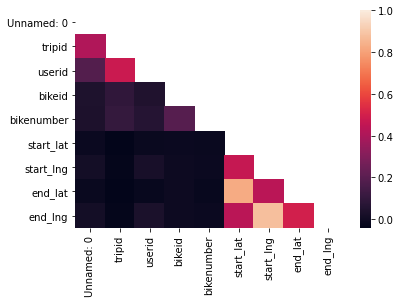

In [6]:
# Plot correlation
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask)
plt.show()

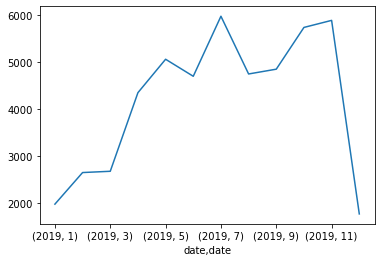

,year,month,day,Count,date
0,2019,1,1,8,2019-01-01
1,2019,1,2,61,2019-01-02
2,2019,1,3,90,2019-01-03
3,2019,1,4,64,2019-01-04
4,2019,1,5,17,2019-01-05
...,...,...,...,...,...
337,2019,12,5,310,2019-12-05
338,2019,12,6,203,2019-12-06
339,2019,12,7,14,2019-12-07
340,2019,12,8,19,2019-12-08


In [7]:
# Show overview of rented bikes
df.date.groupby([df.date.dt.year, df.date.dt.month]).agg('count').plot()
plt.show()
count_by_day = pd.DataFrame(df.date.groupby([df.date.dt.year, df.date.dt.month, df.date.dt.day]).agg('count'))
count_by_day.columns = ['Count']
count_by_day.index.rename('year', level=0, inplace=True)
count_by_day.index.rename('month', level=1, inplace=True)
count_by_day.index.rename('day', level=2, inplace=True)
count_by_day.reset_index(inplace=True)
count_by_day['date'] = pd.to_datetime(count_by_day[['year', 'month', 'day']])
count_by_day

### Data enrichment

In [8]:
# Import National holidays
national_holidays = pd.read_csv("./data/Nationale Feestdagen.csv")
other_holidays = pd.read_csv("./data/Overige Feestdagen.csv")
holidays = pd.concat([national_holidays, other_holidays], ignore_index=True)

In [9]:
# Show data
holidays.head()

,Feestdag,Datum
0,Nieuwjaarsdag 2019,01 Jan 2019
1,Bevrijdingsdag 2019,05 May 2019
2,Hemelvaart 2019,30 May 2019
3,Goede vrijdag 2019,19 Apr 2019
4,1e Paasdag 2019,21 Apr 2019


In [10]:
# Set to datetime
holidays.Datum = pd.to_datetime(holidays.Datum)

In [11]:
# Save as string date-month
holidays.Datum = holidays.Datum.dt.strftime('%d-%m')
holidays.Datum

0     01-01
1     05-05
2     30-05
3     19-04
4     21-04
5     22-04
6     27-04
7     09-06
8     10-06
9     25-12
10    26-12
11    04-05
12    04-10
13    06-01
14    12-05
15    31-10
16    14-02
17    16-06
18    17-09
19    11-11
20    29-11
21    05-12
22    31-12
Name: Datum, dtype: object

In [12]:
# Add column "special_day" to bike data
df['month_year'] = df.date.dt.strftime('%d-%m')
df['special_day'] = df['month_year'].isin(holidays.Datum) * 1
del df['month_year']

# Add to daily count data aswell
count_by_day['month_year'] = count_by_day.date.dt.strftime('%d-%m')
count_by_day['special_day'] = count_by_day['month_year'].isin(holidays.Datum) * 1
del count_by_day['month_year']


In [13]:
# See how many rentals where on a special day
df['special_day'].value_counts()

0    48402
1     1975
Name: special_day, dtype: int64

In [14]:
# See how many rentals are divided over different days
df.date.dt.weekday.value_counts()

1    10813
3    10557
2     9779
0     9406
4     7755
5     1096
6      971
Name: date, dtype: int64

In [15]:
# Add weekday to dataframe
count_by_day['weekday'] = count_by_day.date.dt.weekday

In [16]:
# Add boolean is_workday (ma-fr)
count_by_day['is_workday'] = count_by_day.date.dt.weekday.between(0,4) * 1

### Weather data

In [17]:
KNMI_2019 = pd.read_csv("./data/KNMI_weerdata.csv")
locatie_STN = pd.read_csv("./data/locatie_meetstations.csv")

In [18]:
KNMI_2019

,STN,YYYYMMDD,FHX,FHN,FXX,TN,TX,SQ,SP,DR,RH,RHX,VVN,VVX
0,209,20190101,140.0,70.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,209,20190102,130.0,40.0,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,209,20190103,80.0,50.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,209,20190104,100.0,50.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,209,20190105,110.0,80.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,391,20191228,30.0,10.0,60.0,-22.0,26.0,35.0,45.0,0.0,0.0,0.0,NaN,NaN
17198,391,20191229,30.0,10.0,50.0,-10.0,29.0,9.0,11.0,0.0,0.0,0.0,NaN,NaN
17199,391,20191230,30.0,10.0,60.0,-6.0,80.0,57.0,72.0,0.0,0.0,0.0,NaN,NaN
17200,391,20191231,30.0,0.0,40.0,-18.0,44.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [19]:
# Some weatherstations do not have all columns, those should not be used.
incomplete = KNMI_2019[KNMI_2019.isnull().any(axis=1)].STN.unique()

# Remove from weather data
KNMI_2019 = KNMI_2019[~KNMI_2019.STN.isin(incomplete)]

# Remove from locations
locatie_STN = locatie_STN[~locatie_STN.STN.isin(incomplete)]

In [20]:
# Some locations are not in the dataset, those should be removed from locations aswell
locatie_STN = locatie_STN[locatie_STN.STN.isin(KNMI_2019.STN.unique())]

In [21]:
# Set YYYYMMDD to datetime object
KNMI_2019['date'] = pd.to_datetime(KNMI_2019['YYYYMMDD'], format='%Y%m%d' ).dt.date
KNMI_2019['date']

c:\users\berry\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1464     2019-01-01
1465     2019-01-02
1466     2019-01-03
1467     2019-01-04
1468     2019-01-05
            ...    
16831    2019-12-28
16832    2019-12-29
16833    2019-12-30
16834    2019-12-31
16835    2020-01-01
Name: date, Length: 5856, dtype: object

In [22]:
# Add datetime object to bike count data
count_by_day['day_of_year'] = count_by_day['date'].dt.date

In [23]:
#For each record, get the closest weather station.
# from scipy.spatial.distance import cdist

# def closest_point(point, points):
#     """ Find closest point from a list of points. """
#     return points[cdist([point], points).argmin()]

# def match_value(df, col1, x, col2):
#     """ Match value x from col1 row to value in col2. """
#     return df[df[col1] == x][col2].values[0]

# locatie_STN['point'] = [(x, y) for x,y in zip(locatie_STN['LAT'], locatie_STN['LON'])]
# df['point'] = [(x, y) for x,y in zip(df['start_lat'], df['start_lng'])]

# df['closest_coord'] = [closest_point(x, list(locatie_STN['point'])) for x in df['point']]
# df['closest_weather_station'] = [match_value(locatie_STN, 'point', x, 'STN') for x in df['closest_coord']]

count_by_day['closest_weather_station'] = 240
KNMI_2019.dtypes

STN           int64
YYYYMMDD      int64
FHX         float64
FHN         float64
FXX         float64
TN          float64
TX          float64
SQ          float64
SP          float64
DR          float64
RH          float64
RHX         float64
VVN         float64
VVX         float64
date         object
dtype: object

In [24]:
# Merge on date and STN
count_by_day = pd.merge(count_by_day, KNMI_2019,  how='left', left_on=['day_of_year','closest_weather_station'], right_on = ['date','STN'])

In [25]:
count_by_day.weekday.unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [26]:
# # remove temporary columns
count_by_day.drop(columns=['date_y', 'STN', 'YYYYMMDD', 'closest_weather_station'], inplace=True)

count_by_day.dtypes

year                    int64
month                   int64
day                     int64
Count                   int64
date_x         datetime64[ns]
special_day             int32
weekday                 int64
is_workday              int32
day_of_year            object
FHX                   float64
FHN                   float64
FXX                   float64
TN                    float64
TX                    float64
SQ                    float64
SP                    float64
DR                    float64
RH                    float64
RHX                   float64
VVN                   float64
VVX                   float64
dtype: object

In [27]:
count_by_day.sample(10)

,year,month,day,Count,date_x,special_day,weekday,is_workday,day_of_year,FHX,...,FXX,TN,TX,SQ,SP,DR,RH,RHX,VVN,VVX
11,2019,1,12,15,2019-01-12,0,5,0,2019-01-12,110.0,...,140.0,64.0,88.0,0.0,0.0,35.0,20.0,8.0,28.0,75.0
88,2019,3,30,16,2019-03-30,0,5,0,2019-03-30,40.0,...,80.0,41.0,173.0,96.0,75.0,0.0,0.0,0.0,16.0,61.0
250,2019,9,9,240,2019-09-09,0,0,1,2019-09-09,50.0,...,80.0,72.0,180.0,62.0,47.0,0.0,-1.0,-1.0,65.0,83.0
125,2019,5,6,206,2019-05-06,0,0,1,2019-05-06,70.0,...,110.0,27.0,128.0,21.0,14.0,0.0,-1.0,-1.0,70.0,80.0
202,2019,7,23,257,2019-07-23,0,1,1,2019-07-23,60.0,...,80.0,148.0,310.0,149.0,93.0,0.0,0.0,0.0,67.0,83.0
218,2019,8,8,211,2019-08-08,0,3,1,2019-08-08,80.0,...,120.0,137.0,225.0,110.0,73.0,0.0,-1.0,-1.0,64.0,82.0
153,2019,6,3,255,2019-06-03,0,0,1,2019-06-03,70.0,...,110.0,112.0,195.0,57.0,35.0,0.0,0.0,0.0,64.0,83.0
246,2019,9,5,232,2019-09-05,0,3,1,2019-09-05,90.0,...,150.0,84.0,178.0,79.0,59.0,6.0,11.0,5.0,64.0,81.0
171,2019,6,22,30,2019-06-22,0,5,0,2019-06-22,60.0,...,100.0,95.0,219.0,149.0,89.0,0.0,0.0,0.0,65.0,83.0
196,2019,7,17,299,2019-07-17,0,2,1,2019-07-17,30.0,...,50.0,104.0,246.0,97.0,60.0,0.0,0.0,0.0,56.0,83.0


### Modelling

In [28]:
# Prepare data for model

model_df = count_by_day[['Count', 'date_x', 'special_day', 'weekday',
            'is_workday', 'FHX', 'FHN', 'FXX', 'TN', 'TX', 'SQ',
            'SP', 'DR', 'RH', 'RHX', 'VVN', 'VVX']
            ]
# weekday is pretty categorical. This should be mapped.
model_df['weekday'] = model_df['weekday'].map({
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday'
})
model_df = pd.get_dummies(model_df, prefix='', prefix_sep='')
model_df.tail()

c:\users\berry\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Count,date_x,special_day,is_workday,FHX,FHN,FXX,TN,TX,SQ,...,RHX,VVN,VVX,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
337,310,2019-12-05,1,1,90.0,20.0,130.0,-23.0,58.0,20.0,...,2.0,1.0,56.0,0,0,0,0,1,0,0
338,203,2019-12-06,0,1,120.0,70.0,180.0,55.0,100.0,0.0,...,31.0,30.0,68.0,1,0,0,0,0,0,0
339,14,2019-12-07,0,0,90.0,60.0,140.0,75.0,104.0,0.0,...,-1.0,68.0,75.0,0,0,1,0,0,0,0
340,19,2019-12-08,0,0,130.0,80.0,190.0,73.0,114.0,24.0,...,25.0,41.0,75.0,0,0,0,1,0,0,0
341,253,2019-12-09,0,1,90.0,30.0,170.0,36.0,91.0,7.0,...,62.0,57.0,71.0,0,1,0,0,0,0,0


In [29]:
# Split data
split_date = pd.datetime(2019,11,1)
train_data = model_df.loc[model_df.date_x < split_date]
test_data = model_df.loc[model_df.date_x >= split_date]
model_df

c:\users\berry\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


,Count,date_x,special_day,is_workday,FHX,FHN,FXX,TN,TX,SQ,...,RHX,VVN,VVX,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,8,2019-01-01,1,1,90.0,60.0,180.0,52.0,91.0,13.0,...,2.0,30.0,75.0,0,0,0,0,0,1,0
1,61,2019-01-02,0,1,70.0,20.0,130.0,25.0,71.0,4.0,...,-1.0,62.0,75.0,0,0,0,0,0,0,1
2,90,2019-01-03,0,1,40.0,10.0,80.0,3.0,68.0,46.0,...,-1.0,65.0,75.0,0,0,0,0,1,0,0
3,64,2019-01-04,0,1,60.0,20.0,100.0,10.0,68.0,0.0,...,-1.0,37.0,75.0,1,0,0,0,0,0,0
4,17,2019-01-05,0,0,80.0,50.0,140.0,57.0,81.0,0.0,...,1.0,50.0,75.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,310,2019-12-05,1,1,90.0,20.0,130.0,-23.0,58.0,20.0,...,2.0,1.0,56.0,0,0,0,0,1,0,0
338,203,2019-12-06,0,1,120.0,70.0,180.0,55.0,100.0,0.0,...,31.0,30.0,68.0,1,0,0,0,0,0,0
339,14,2019-12-07,0,0,90.0,60.0,140.0,75.0,104.0,0.0,...,-1.0,68.0,75.0,0,0,1,0,0,0,0
340,19,2019-12-08,0,0,130.0,80.0,190.0,73.0,114.0,24.0,...,25.0,41.0,75.0,0,0,0,1,0,0,0


In [30]:
train_stats = train_data.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Count,303.0,140.990099,98.162876,3.0,31.5,145.0,225.5,400.0
special_day,303.0,0.052805,0.224015,0.0,0.0,0.0,0.0,1.0
is_workday,303.0,0.719472,0.450000,0.0,0.0,1.0,1.0,1.0
FHX,303.0,73.795380,27.532961,20.0,60.0,70.0,90.0,170.0
FHN,303.0,23.960396,16.801088,0.0,10.0,20.0,30.0,90.0
FXX,303.0,118.910891,42.509858,40.0,90.0,110.0,140.0,250.0
TN,303.0,80.128713,53.488687,-71.0,40.5,84.0,119.5,199.0
TX,303.0,164.762376,67.042412,-2.0,113.0,173.0,212.0,364.0
SQ,303.0,60.019802,43.900093,0.0,21.0,56.0,97.0,155.0
SP,303.0,44.270627,30.921381,0.0,15.0,44.0,72.5,93.0


In [31]:
# show ranges
print('Latest train data:', train_data.date_x.max())
print('Oldest test data:', test_data.date_x.min())

Latest train data: 2019-10-31 00:00:00
Oldest test data: 2019-11-01 00:00:00


In [32]:
train_labels = train_data.pop('Count')
test_labels = test_data.pop('Count')
train_data.pop('date_x')
test_data.pop('date_x')

303   2019-11-01
304   2019-11-02
305   2019-11-03
306   2019-11-04
307   2019-11-05
308   2019-11-06
309   2019-11-07
310   2019-11-08
311   2019-11-09
312   2019-11-10
313   2019-11-11
314   2019-11-12
315   2019-11-13
316   2019-11-14
317   2019-11-15
318   2019-11-16
319   2019-11-17
320   2019-11-18
321   2019-11-19
322   2019-11-20
323   2019-11-21
324   2019-11-22
325   2019-11-23
326   2019-11-24
327   2019-11-25
328   2019-11-26
329   2019-11-27
330   2019-11-28
331   2019-11-29
332   2019-11-30
333   2019-12-01
334   2019-12-02
335   2019-12-03
336   2019-12-04
337   2019-12-05
338   2019-12-06
339   2019-12-07
340   2019-12-08
341   2019-12-09
Name: date_x, dtype: datetime64[ns]

In [33]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data.loc[:, train_data.columns != 'date_x'])
normed_test_data = norm(test_data.loc[:, test_data.columns != 'date_x'])

del normed_train_data['Count']
del normed_test_data['Count']

### Build model

In [34]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [35]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Train on 242 samples, validate on 61 samples
Epoch 1/1000
242/242 [==============================] - 0s 2ms/sample - loss: 26325.4246 - mae: 132.5122 - mse: 26325.4258 - val_loss: 41463.7799 - val_mae: 173.0313 - val_mse: 41463.7773
Epoch 2/1000
242/242 [==============================] - 0s 99us/sample - loss: 26176.8647 - mae: 132.0778 - mse: 26176.8652 - val_loss: 41338.6748 - val_mae: 172.7478 - val_mse: 41338.6719
Epoch 3/1000
242/242 [==============================] - 0s 116us/sample - loss: 26060.5261 - mae: 131.7416 - mse: 26060.5254 - val_loss: 41221.4650 - val_mae: 172.4817 - val_mse: 41221.4688
Epoch 4/1000
242/242 [==============================] - 0s 136us/sample - loss: 25949.4024 - mae: 131.4213 - mse: 25949.4023 - val_loss: 41110.0331 - val_mae: 172.2261 - val_mse: 41110.0312
Epoch 5/1000
242/242 [==============================] - 0s 140us/sample - loss: 25838.0186 - mae: 131.0989 - mse: 25838.0156 - val_loss: 40993.7482 - val_mae: 171.9608 - val_mse: 40993.7461
Epoch 6/

Epoch 44/1000
242/242 [==============================] - 0s 95us/sample - loss: 17791.5712 - mae: 107.4954 - mse: 17791.5703 - val_loss: 33423.7741 - val_mae: 153.9940 - val_mse: 33423.7734
Epoch 45/1000
242/242 [==============================] - 0s 91us/sample - loss: 17481.5642 - mae: 106.5523 - mse: 17481.5645 - val_loss: 33137.9829 - val_mae: 153.3135 - val_mse: 33137.9844
Epoch 46/1000
242/242 [==============================] - 0s 91us/sample - loss: 17182.9257 - mae: 105.6207 - mse: 17182.9258 - val_loss: 32850.6586 - val_mae: 152.6232 - val_mse: 32850.6562
Epoch 47/1000
242/242 [==============================] - 0s 95us/sample - loss: 16880.6591 - mae: 104.6986 - mse: 16880.6602 - val_loss: 32562.7893 - val_mae: 151.9263 - val_mse: 32562.7910
Epoch 48/1000
242/242 [==============================] - 0s 83us/sample - loss: 16569.3891 - mae: 103.7497 - mse: 16569.3887 - val_loss: 32261.4835 - val_mae: 151.1919 - val_mse: 32261.4844
Epoch 49/1000
242/242 [===========================

242/242 [==============================] - 0s 87us/sample - loss: 5680.5457 - mae: 59.2319 - mse: 5680.5454 - val_loss: 19398.5745 - val_mae: 114.3053 - val_mse: 19398.5742
Epoch 88/1000
242/242 [==============================] - 0s 87us/sample - loss: 5498.5545 - mae: 58.1527 - mse: 5498.5547 - val_loss: 19087.0939 - val_mae: 113.2595 - val_mse: 19087.0938
Epoch 89/1000
242/242 [==============================] - 0s 91us/sample - loss: 5324.9012 - mae: 57.1455 - mse: 5324.9014 - val_loss: 18769.4107 - val_mae: 112.1796 - val_mse: 18769.4102
Epoch 90/1000
242/242 [==============================] - 0s 103us/sample - loss: 5152.7033 - mae: 56.0694 - mse: 5152.7036 - val_loss: 18450.8391 - val_mae: 111.0821 - val_mse: 18450.8398
Epoch 91/1000
242/242 [==============================] - 0s 99us/sample - loss: 4981.7775 - mae: 54.9941 - mse: 4981.7773 - val_loss: 18115.2489 - val_mae: 109.9087 - val_mse: 18115.2500
Epoch 92/1000
242/242 [==============================] - 0s 91us/sample - loss

Epoch 131/1000
242/242 [==============================] - 0s 99us/sample - loss: 1543.3395 - mae: 28.9151 - mse: 1543.3396 - val_loss: 8680.3077 - val_mae: 73.0433 - val_mse: 8680.3076
Epoch 132/1000
242/242 [==============================] - 0s 112us/sample - loss: 1519.3238 - mae: 28.7482 - mse: 1519.3239 - val_loss: 8572.4937 - val_mae: 72.4566 - val_mse: 8572.4941
Epoch 133/1000
242/242 [==============================] - 0s 87us/sample - loss: 1500.4438 - mae: 28.5863 - mse: 1500.4438 - val_loss: 8446.6020 - val_mae: 71.7741 - val_mse: 8446.6016
Epoch 134/1000
242/242 [==============================] - 0s 99us/sample - loss: 1480.4577 - mae: 28.4096 - mse: 1480.4578 - val_loss: 8365.4091 - val_mae: 71.3332 - val_mse: 8365.4092
Epoch 135/1000
242/242 [==============================] - 0s 87us/sample - loss: 1462.6278 - mae: 28.2498 - mse: 1462.6278 - val_loss: 8269.5817 - val_mae: 70.8042 - val_mse: 8269.5820
Epoch 136/1000
242/242 [==============================] - 0s 91us/sample -

242/242 [==============================] - 0s 112us/sample - loss: 1213.1492 - mae: 25.8149 - mse: 1213.1493 - val_loss: 7111.4931 - val_mae: 64.0686 - val_mse: 7111.4932
Epoch 176/1000
242/242 [==============================] - 0s 99us/sample - loss: 1208.7412 - mae: 25.7597 - mse: 1208.7411 - val_loss: 7123.5698 - val_mae: 64.1522 - val_mse: 7123.5698
Epoch 177/1000
242/242 [==============================] - 0s 91us/sample - loss: 1205.1913 - mae: 25.7290 - mse: 1205.1914 - val_loss: 7112.2623 - val_mae: 64.0784 - val_mse: 7112.2622
Epoch 178/1000
242/242 [==============================] - 0s 103us/sample - loss: 1201.5520 - mae: 25.7002 - mse: 1201.5519 - val_loss: 7110.6097 - val_mae: 64.0404 - val_mse: 7110.6099
Epoch 179/1000
242/242 [==============================] - 0s 95us/sample - loss: 1199.9551 - mae: 25.6839 - mse: 1199.9551 - val_loss: 7119.0363 - val_mae: 64.0833 - val_mse: 7119.0356
Epoch 180/1000
242/242 [==============================] - 0s 95us/sample - loss: 1195.94

242/242 [==============================] - 0s 95us/sample - loss: 1101.4357 - mae: 24.4183 - mse: 1101.4357 - val_loss: 6835.1192 - val_mae: 62.3575 - val_mse: 6835.1191
Epoch 220/1000
242/242 [==============================] - 0s 91us/sample - loss: 1098.9952 - mae: 24.4429 - mse: 1098.9952 - val_loss: 6841.3096 - val_mae: 62.3804 - val_mse: 6841.3096
Epoch 221/1000
242/242 [==============================] - 0s 91us/sample - loss: 1095.3076 - mae: 24.3928 - mse: 1095.3076 - val_loss: 6819.0627 - val_mae: 62.2508 - val_mse: 6819.0625
Epoch 222/1000
242/242 [==============================] - 0s 83us/sample - loss: 1094.8001 - mae: 24.3562 - mse: 1094.8000 - val_loss: 6805.0264 - val_mae: 62.1580 - val_mse: 6805.0269
Epoch 223/1000
242/242 [==============================] - 0s 91us/sample - loss: 1091.9455 - mae: 24.3376 - mse: 1091.9456 - val_loss: 6816.9481 - val_mae: 62.2328 - val_mse: 6816.9478
Epoch 224/1000
242/242 [==============================] - 0s 91us/sample - loss: 1089.2162

242/242 [==============================] - 0s 99us/sample - loss: 1015.6431 - mae: 23.2357 - mse: 1015.6431 - val_loss: 6557.0397 - val_mae: 60.5757 - val_mse: 6557.0400
Epoch 264/1000
242/242 [==============================] - 0s 95us/sample - loss: 1014.9294 - mae: 23.1881 - mse: 1014.9294 - val_loss: 6536.9414 - val_mae: 60.4620 - val_mse: 6536.9414
Epoch 265/1000
242/242 [==============================] - 0s 91us/sample - loss: 1011.5824 - mae: 23.1474 - mse: 1011.5823 - val_loss: 6547.5469 - val_mae: 60.5110 - val_mse: 6547.5474
Epoch 266/1000
242/242 [==============================] - 0s 91us/sample - loss: 1011.3880 - mae: 23.1336 - mse: 1011.3881 - val_loss: 6551.5061 - val_mae: 60.5262 - val_mse: 6551.5063
Epoch 267/1000
242/242 [==============================] - 0s 103us/sample - loss: 1007.4969 - mae: 23.1325 - mse: 1007.4969 - val_loss: 6580.6993 - val_mae: 60.6867 - val_mse: 6580.6992
Epoch 268/1000
242/242 [==============================] - 0s 87us/sample - loss: 1008.138

Epoch 308/1000
242/242 [==============================] - 0s 87us/sample - loss: 945.9493 - mae: 22.1760 - mse: 945.9493 - val_loss: 6382.4657 - val_mae: 59.4547 - val_mse: 6382.4663
Epoch 309/1000
242/242 [==============================] - 0s 87us/sample - loss: 943.2222 - mae: 22.1167 - mse: 943.2221 - val_loss: 6375.3742 - val_mae: 59.4400 - val_mse: 6375.3740
Epoch 310/1000
242/242 [==============================] - 0s 91us/sample - loss: 942.7634 - mae: 22.1194 - mse: 942.7634 - val_loss: 6358.0565 - val_mae: 59.3111 - val_mse: 6358.0562
Epoch 311/1000
242/242 [==============================] - 0s 83us/sample - loss: 941.4934 - mae: 22.1036 - mse: 941.4933 - val_loss: 6361.3579 - val_mae: 59.3227 - val_mse: 6361.3574
Epoch 312/1000
242/242 [==============================] - 0s 83us/sample - loss: 939.4921 - mae: 22.0581 - mse: 939.4921 - val_loss: 6358.0649 - val_mae: 59.2879 - val_mse: 6358.0649
Epoch 313/1000
242/242 [==============================] - 0s 95us/sample - loss: 937.

Epoch 353/1000
242/242 [==============================] - 0s 95us/sample - loss: 888.0433 - mae: 21.2951 - mse: 888.0434 - val_loss: 6231.2588 - val_mae: 58.5662 - val_mse: 6231.2593
Epoch 354/1000
242/242 [==============================] - 0s 91us/sample - loss: 889.8757 - mae: 21.3404 - mse: 889.8758 - val_loss: 6213.6851 - val_mae: 58.4726 - val_mse: 6213.6855
Epoch 355/1000
242/242 [==============================] - 0s 91us/sample - loss: 883.7976 - mae: 21.2052 - mse: 883.7976 - val_loss: 6205.2008 - val_mae: 58.4155 - val_mse: 6205.2007
Epoch 356/1000
242/242 [==============================] - 0s 95us/sample - loss: 882.8766 - mae: 21.2241 - mse: 882.8766 - val_loss: 6225.5021 - val_mae: 58.5614 - val_mse: 6225.5020
Epoch 357/1000
242/242 [==============================] - 0s 103us/sample - loss: 882.9996 - mae: 21.2056 - mse: 882.9996 - val_loss: 6207.5319 - val_mae: 58.4600 - val_mse: 6207.5317
Epoch 358/1000
242/242 [==============================] - 0s 87us/sample - loss: 882

Epoch 398/1000
242/242 [==============================] - 0s 103us/sample - loss: 839.7558 - mae: 20.5941 - mse: 839.7558 - val_loss: 6072.0552 - val_mae: 57.7681 - val_mse: 6072.0552
Epoch 399/1000
242/242 [==============================] - 0s 103us/sample - loss: 835.2480 - mae: 20.5544 - mse: 835.2479 - val_loss: 6074.6343 - val_mae: 57.8048 - val_mse: 6074.6343
Epoch 400/1000
242/242 [==============================] - 0s 87us/sample - loss: 835.5435 - mae: 20.5256 - mse: 835.5435 - val_loss: 6050.4359 - val_mae: 57.6707 - val_mse: 6050.4355
Epoch 401/1000
242/242 [==============================] - 0s 91us/sample - loss: 833.3362 - mae: 20.5463 - mse: 833.3362 - val_loss: 6024.3689 - val_mae: 57.5140 - val_mse: 6024.3687
Epoch 402/1000
242/242 [==============================] - 0s 87us/sample - loss: 833.4438 - mae: 20.5182 - mse: 833.4438 - val_loss: 6032.5969 - val_mae: 57.5659 - val_mse: 6032.5967
Epoch 403/1000
242/242 [==============================] - 0s 91us/sample - loss: 83

Epoch 443/1000
242/242 [==============================] - 0s 99us/sample - loss: 792.9235 - mae: 20.0200 - mse: 792.9236 - val_loss: 5914.5768 - val_mae: 57.1393 - val_mse: 5914.5767
Epoch 444/1000
242/242 [==============================] - 0s 91us/sample - loss: 792.5629 - mae: 20.0360 - mse: 792.5629 - val_loss: 5896.9579 - val_mae: 57.0473 - val_mse: 5896.9580
Epoch 445/1000
242/242 [==============================] - 0s 91us/sample - loss: 791.0239 - mae: 19.9792 - mse: 791.0239 - val_loss: 5883.9793 - val_mae: 56.9868 - val_mse: 5883.9795
Epoch 446/1000
242/242 [==============================] - 0s 99us/sample - loss: 790.3032 - mae: 20.0322 - mse: 790.3032 - val_loss: 5873.7328 - val_mae: 56.9339 - val_mse: 5873.7324
Epoch 447/1000
242/242 [==============================] - 0s 95us/sample - loss: 791.6449 - mae: 20.0274 - mse: 791.6449 - val_loss: 5881.3793 - val_mae: 56.9968 - val_mse: 5881.3789
Epoch 448/1000
242/242 [==============================] - 0s 95us/sample - loss: 790.

Epoch 488/1000
242/242 [==============================] - 0s 95us/sample - loss: 755.4937 - mae: 19.5668 - mse: 755.4936 - val_loss: 5818.0850 - val_mae: 56.8458 - val_mse: 5818.0850
Epoch 489/1000
242/242 [==============================] - 0s 95us/sample - loss: 757.3631 - mae: 19.5321 - mse: 757.3631 - val_loss: 5813.0381 - val_mae: 56.8159 - val_mse: 5813.0381
Epoch 490/1000
242/242 [==============================] - 0s 87us/sample - loss: 754.2324 - mae: 19.5845 - mse: 754.2323 - val_loss: 5818.1333 - val_mae: 56.8165 - val_mse: 5818.1333
Epoch 491/1000
242/242 [==============================] - 0s 87us/sample - loss: 755.4304 - mae: 19.5511 - mse: 755.4304 - val_loss: 5799.1030 - val_mae: 56.6913 - val_mse: 5799.1030
Epoch 492/1000
242/242 [==============================] - 0s 91us/sample - loss: 752.9639 - mae: 19.4820 - mse: 752.9639 - val_loss: 5783.8757 - val_mae: 56.6158 - val_mse: 5783.8760
Epoch 493/1000
242/242 [==============================] - 0s 91us/sample - loss: 752.

Epoch 533/1000
242/242 [==============================] - 0s 99us/sample - loss: 724.4110 - mae: 19.1529 - mse: 724.4111 - val_loss: 5709.3534 - val_mae: 56.3768 - val_mse: 5709.3535
Epoch 534/1000
242/242 [==============================] - 0s 91us/sample - loss: 721.9104 - mae: 19.1258 - mse: 721.9104 - val_loss: 5703.9733 - val_mae: 56.3507 - val_mse: 5703.9731
Epoch 535/1000
242/242 [==============================] - 0s 99us/sample - loss: 720.9235 - mae: 19.1090 - mse: 720.9235 - val_loss: 5708.3749 - val_mae: 56.4023 - val_mse: 5708.3750
Epoch 536/1000
242/242 [==============================] - 0s 87us/sample - loss: 720.4411 - mae: 19.0721 - mse: 720.4411 - val_loss: 5692.7708 - val_mae: 56.2955 - val_mse: 5692.7705
Epoch 537/1000
242/242 [==============================] - 0s 91us/sample - loss: 721.6618 - mae: 19.0993 - mse: 721.6619 - val_loss: 5706.9889 - val_mae: 56.3947 - val_mse: 5706.9888
Epoch 538/1000
242/242 [==============================] - 0s 83us/sample - loss: 720.

Epoch 578/1000
242/242 [==============================] - 0s 91us/sample - loss: 694.1849 - mae: 18.7661 - mse: 694.1849 - val_loss: 5607.9415 - val_mae: 55.9412 - val_mse: 5607.9414
Epoch 579/1000
242/242 [==============================] - 0s 99us/sample - loss: 692.5944 - mae: 18.7107 - mse: 692.5945 - val_loss: 5620.3329 - val_mae: 55.9952 - val_mse: 5620.3330
Epoch 580/1000
242/242 [==============================] - 0s 95us/sample - loss: 689.9600 - mae: 18.6649 - mse: 689.9600 - val_loss: 5628.4846 - val_mae: 56.0513 - val_mse: 5628.4849
Epoch 581/1000
242/242 [==============================] - 0s 95us/sample - loss: 691.6813 - mae: 18.6964 - mse: 691.6812 - val_loss: 5637.4253 - val_mae: 56.1020 - val_mse: 5637.4253
Epoch 582/1000
242/242 [==============================] - 0s 83us/sample - loss: 691.2190 - mae: 18.6682 - mse: 691.2191 - val_loss: 5607.9143 - val_mae: 55.9534 - val_mse: 5607.9146
Epoch 583/1000
242/242 [==============================] - 0s 91us/sample - loss: 689.

Epoch 623/1000
242/242 [==============================] - 0s 95us/sample - loss: 665.5313 - mae: 18.3334 - mse: 665.5313 - val_loss: 5512.2104 - val_mae: 55.6496 - val_mse: 5512.2104
Epoch 624/1000
242/242 [==============================] - 0s 95us/sample - loss: 664.7941 - mae: 18.3385 - mse: 664.7940 - val_loss: 5541.6130 - val_mae: 55.8453 - val_mse: 5541.6128
Epoch 625/1000
242/242 [==============================] - 0s 91us/sample - loss: 664.6512 - mae: 18.3363 - mse: 664.6513 - val_loss: 5546.9627 - val_mae: 55.8789 - val_mse: 5546.9624
Epoch 626/1000
242/242 [==============================] - 0s 83us/sample - loss: 664.4406 - mae: 18.3208 - mse: 664.4406 - val_loss: 5538.4697 - val_mae: 55.8060 - val_mse: 5538.4692
Epoch 627/1000
242/242 [==============================] - 0s 87us/sample - loss: 662.9489 - mae: 18.3067 - mse: 662.9489 - val_loss: 5529.0083 - val_mae: 55.7472 - val_mse: 5529.0083
Epoch 628/1000
242/242 [==============================] - 0s 91us/sample - loss: 663.

Epoch 668/1000
242/242 [==============================] - 0s 91us/sample - loss: 641.9888 - mae: 17.9892 - mse: 641.9888 - val_loss: 5465.9417 - val_mae: 55.5370 - val_mse: 5465.9414
Epoch 669/1000
242/242 [==============================] - 0s 95us/sample - loss: 640.9528 - mae: 17.9587 - mse: 640.9528 - val_loss: 5464.1113 - val_mae: 55.5208 - val_mse: 5464.1118
Epoch 670/1000
242/242 [==============================] - 0s 87us/sample - loss: 641.6823 - mae: 17.9938 - mse: 641.6822 - val_loss: 5460.8512 - val_mae: 55.5187 - val_mse: 5460.8516
Epoch 671/1000
242/242 [==============================] - 0s 91us/sample - loss: 639.1379 - mae: 17.9685 - mse: 639.1379 - val_loss: 5444.9931 - val_mae: 55.4323 - val_mse: 5444.9927
Epoch 672/1000
242/242 [==============================] - 0s 87us/sample - loss: 639.4979 - mae: 18.0016 - mse: 639.4979 - val_loss: 5438.0093 - val_mae: 55.3813 - val_mse: 5438.0093
Epoch 673/1000
242/242 [==============================] - 0s 83us/sample - loss: 639.

Epoch 713/1000
242/242 [==============================] - 0s 91us/sample - loss: 619.2544 - mae: 17.6268 - mse: 619.2543 - val_loss: 5408.5932 - val_mae: 55.4215 - val_mse: 5408.5933
Epoch 714/1000
242/242 [==============================] - 0s 95us/sample - loss: 619.9588 - mae: 17.6234 - mse: 619.9588 - val_loss: 5420.7224 - val_mae: 55.5018 - val_mse: 5420.7222
Epoch 715/1000
242/242 [==============================] - 0s 82us/sample - loss: 620.7983 - mae: 17.6862 - mse: 620.7983 - val_loss: 5427.6493 - val_mae: 55.5321 - val_mse: 5427.6489
Epoch 716/1000
242/242 [==============================] - 0s 82us/sample - loss: 619.0169 - mae: 17.5924 - mse: 619.0169 - val_loss: 5417.5864 - val_mae: 55.4655 - val_mse: 5417.5859
Epoch 717/1000
242/242 [==============================] - 0s 83us/sample - loss: 618.6672 - mae: 17.5734 - mse: 618.6672 - val_loss: 5396.2106 - val_mae: 55.3401 - val_mse: 5396.2104
Epoch 718/1000
242/242 [==============================] - 0s 87us/sample - loss: 617.

Epoch 758/1000
242/242 [==============================] - 0s 91us/sample - loss: 602.0854 - mae: 17.3522 - mse: 602.0854 - val_loss: 5375.6002 - val_mae: 55.3247 - val_mse: 5375.6006
Epoch 759/1000
242/242 [==============================] - 0s 87us/sample - loss: 598.6477 - mae: 17.3038 - mse: 598.6478 - val_loss: 5353.3518 - val_mae: 55.2021 - val_mse: 5353.3516
Epoch 760/1000
242/242 [==============================] - 0s 91us/sample - loss: 599.2122 - mae: 17.3004 - mse: 599.2122 - val_loss: 5353.5954 - val_mae: 55.2130 - val_mse: 5353.5952
Epoch 761/1000
242/242 [==============================] - 0s 95us/sample - loss: 597.3479 - mae: 17.2796 - mse: 597.3480 - val_loss: 5379.7070 - val_mae: 55.3624 - val_mse: 5379.7070
Epoch 762/1000
242/242 [==============================] - 0s 87us/sample - loss: 598.5857 - mae: 17.3072 - mse: 598.5857 - val_loss: 5355.4356 - val_mae: 55.2333 - val_mse: 5355.4360
Epoch 763/1000
242/242 [==============================] - 0s 87us/sample - loss: 598.

Epoch 803/1000
242/242 [==============================] - 0s 87us/sample - loss: 581.1088 - mae: 17.0284 - mse: 581.1089 - val_loss: 5352.3967 - val_mae: 55.3045 - val_mse: 5352.3965
Epoch 804/1000
242/242 [==============================] - 0s 95us/sample - loss: 580.9089 - mae: 17.0165 - mse: 580.9089 - val_loss: 5343.0874 - val_mae: 55.2578 - val_mse: 5343.0874
Epoch 805/1000
242/242 [==============================] - 0s 87us/sample - loss: 580.3636 - mae: 17.0171 - mse: 580.3636 - val_loss: 5333.5596 - val_mae: 55.2034 - val_mse: 5333.5601
Epoch 806/1000
242/242 [==============================] - 0s 91us/sample - loss: 581.4759 - mae: 17.0154 - mse: 581.4758 - val_loss: 5339.3046 - val_mae: 55.2647 - val_mse: 5339.3047
Epoch 807/1000
242/242 [==============================] - 0s 95us/sample - loss: 579.6346 - mae: 17.0036 - mse: 579.6346 - val_loss: 5329.1982 - val_mae: 55.2359 - val_mse: 5329.1982
Epoch 808/1000
242/242 [==============================] - 0s 91us/sample - loss: 580.

Epoch 848/1000
242/242 [==============================] - 0s 103us/sample - loss: 566.0613 - mae: 16.8048 - mse: 566.0613 - val_loss: 5326.6798 - val_mae: 55.2848 - val_mse: 5326.6792
Epoch 849/1000
242/242 [==============================] - 0s 99us/sample - loss: 566.5719 - mae: 16.7966 - mse: 566.5719 - val_loss: 5338.6848 - val_mae: 55.3431 - val_mse: 5338.6846
Epoch 850/1000
242/242 [==============================] - 0s 87us/sample - loss: 564.4347 - mae: 16.7862 - mse: 564.4348 - val_loss: 5315.7425 - val_mae: 55.2035 - val_mse: 5315.7427
Epoch 851/1000
242/242 [==============================] - 0s 83us/sample - loss: 562.8844 - mae: 16.7644 - mse: 562.8844 - val_loss: 5333.6499 - val_mae: 55.3163 - val_mse: 5333.6494
Epoch 852/1000
242/242 [==============================] - 0s 91us/sample - loss: 564.9322 - mae: 16.7856 - mse: 564.9321 - val_loss: 5326.0309 - val_mae: 55.2645 - val_mse: 5326.0308
Epoch 853/1000
242/242 [==============================] - 0s 95us/sample - loss: 563

242/242 [==============================] - 0s 99us/sample - loss: 549.9243 - mae: 16.5252 - mse: 549.9243 - val_loss: 5307.3911 - val_mae: 55.2665 - val_mse: 5307.3916
Epoch 893/1000
242/242 [==============================] - 0s 95us/sample - loss: 549.1763 - mae: 16.5134 - mse: 549.1763 - val_loss: 5304.0783 - val_mae: 55.2457 - val_mse: 5304.0786
Epoch 894/1000
242/242 [==============================] - 0s 91us/sample - loss: 548.5421 - mae: 16.5058 - mse: 548.5421 - val_loss: 5309.6494 - val_mae: 55.2859 - val_mse: 5309.6494
Epoch 895/1000
242/242 [==============================] - 0s 87us/sample - loss: 548.3513 - mae: 16.4930 - mse: 548.3513 - val_loss: 5334.5224 - val_mae: 55.4351 - val_mse: 5334.5225
Epoch 896/1000
242/242 [==============================] - 0s 91us/sample - loss: 549.8249 - mae: 16.5370 - mse: 549.8249 - val_loss: 5326.7450 - val_mae: 55.4005 - val_mse: 5326.7451
Epoch 897/1000
242/242 [==============================] - 0s 95us/sample - loss: 547.5876 - mae: 16.

Epoch 937/1000
242/242 [==============================] - 0s 87us/sample - loss: 533.8848 - mae: 16.3110 - mse: 533.8848 - val_loss: 5330.3408 - val_mae: 55.4713 - val_mse: 5330.3408
Epoch 938/1000
242/242 [==============================] - 0s 91us/sample - loss: 534.2622 - mae: 16.3301 - mse: 534.2621 - val_loss: 5336.5596 - val_mae: 55.5134 - val_mse: 5336.5596
Epoch 939/1000
242/242 [==============================] - 0s 87us/sample - loss: 534.1644 - mae: 16.3276 - mse: 534.1644 - val_loss: 5311.0486 - val_mae: 55.3520 - val_mse: 5311.0483
Epoch 940/1000
242/242 [==============================] - 0s 91us/sample - loss: 532.9090 - mae: 16.2877 - mse: 532.9090 - val_loss: 5301.1681 - val_mae: 55.3027 - val_mse: 5301.1680
Epoch 941/1000
242/242 [==============================] - 0s 87us/sample - loss: 533.8247 - mae: 16.2634 - mse: 533.8246 - val_loss: 5308.2189 - val_mae: 55.3588 - val_mse: 5308.2188
Epoch 942/1000
242/242 [==============================] - 0s 87us/sample - loss: 531.

Epoch 982/1000
242/242 [==============================] - 0s 91us/sample - loss: 519.6114 - mae: 16.0752 - mse: 519.6113 - val_loss: 5295.7522 - val_mae: 55.3362 - val_mse: 5295.7520
Epoch 983/1000
242/242 [==============================] - 0s 91us/sample - loss: 521.1797 - mae: 16.1360 - mse: 521.1796 - val_loss: 5300.2613 - val_mae: 55.3761 - val_mse: 5300.2612
Epoch 984/1000
242/242 [==============================] - 0s 83us/sample - loss: 519.0086 - mae: 16.0609 - mse: 519.0086 - val_loss: 5307.3231 - val_mae: 55.4240 - val_mse: 5307.3228
Epoch 985/1000
242/242 [==============================] - 0s 87us/sample - loss: 519.6731 - mae: 16.0973 - mse: 519.6732 - val_loss: 5304.8986 - val_mae: 55.4141 - val_mse: 5304.8984
Epoch 986/1000
242/242 [==============================] - 0s 91us/sample - loss: 517.9356 - mae: 16.0667 - mse: 517.9356 - val_loss: 5315.5145 - val_mae: 55.4748 - val_mse: 5315.5142
Epoch 987/1000
242/242 [==============================] - 0s 83us/sample - loss: 520.

In [36]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,515.209924,15.982141,515.209900,5317.902024,55.517040,5317.901855,995
996,515.390897,15.999310,515.390930,5318.415936,55.530563,5318.416016,996
997,514.824440,16.018665,514.824463,5296.513144,55.412014,5296.513184,997
998,514.191071,16.009327,514.191040,5279.212250,55.315311,5279.211914,998
999,515.872008,16.010572,515.872009,5278.325756,55.311485,5278.325684,999


### Predict

In [37]:
test_predictions = model.predict(normed_test_data).flatten()

In [38]:
model_df['prediction'] = pd.Series(np.round(test_predictions))

In [39]:
((model_df.prediction - model_df.Count) ** 2).mean() ** .5

83.47746509979312

### Conclusie
De RMSE van dit model is uiteraard nog zeer hoog. Dit model is dan ook een eerste versie die nog verbeterd gaat worden in de komende weken.